# TODO
- (argmax, max) per speedup e scalabilita
- qualcosa vs dimensione collezione (n) per vedere la gustafson legge

In [231]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [232]:
results_df = pd.read_csv("../Statistics/service_time_trial.csv")
results_df.head()

,max_nw,active_workers_history,service_time_history,service_time_goal,emitter_elapsed_time_history,workers_elapsed_time_history,collector_elapsed_time_history
0,256,8,529,200,28130,4238,4579
1,256,21,200,200,20,4215,3
2,256,21,214,200,14,4602,1
3,256,23,199,200,13,4611,1
4,256,23,204,200,10,4739,1


### Service Time History

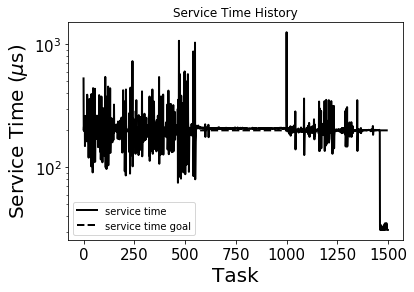

In [233]:
# plot servive_time_history vs service_time_goal
results_df.plot(y=['service_time_history', 'service_time_goal'],
                style=['-', '--'],
                color=['black', 'black'],
                label=['service time', 'service time goal'],
                linewidth=2)

plt.ylabel('Service Time ($\mu$s)', fontsize=20)
plt.xlabel('Task', fontsize=20)
plt.yscale('log')
plt.title('Service Time History')
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.show()

### Service Time Error

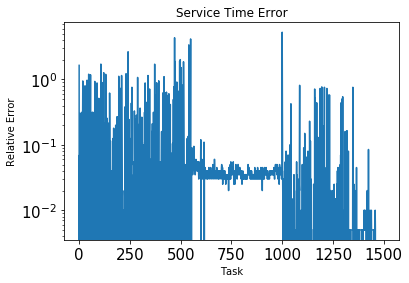

In [234]:
# plot relative error between  service_time_goal and service_time_history

y1 = np.array(results_df['service_time_history'])
y2 = np.array(results_df['service_time_goal'])

relative_error = (y1-y2)/y2

plt.plot(relative_error)
plt.yscale('log')
plt.ylabel('Relative Error')
plt.xlabel('Task')
plt.title('Service Time Error')
plt.show()


In [235]:
relative_error = (y1-y2)/y2
relative_abs_error = np.abs((y1-y2)/y2)

print("mean error", round(np.mean(relative_error),3))
print("mean abs error", round(np.mean(relative_abs_error),3))

mean error 0.02
mean abs error 0.146


### Throughput

In [236]:
"""
throughput_history = 1/y1
throughtput_goal = 1/y2

plt.plot(throughput_history,'-', color='black', label='throughput history')
plt.plot(throughtput_goal, '--', color='black', label='throughput goal')
plt.xlabel('Tasks')
plt.ylabel('Throughput')
plt.title('Throughput History')
plt.show()
"""

"\nthroughput_history = 1/y1\nthroughtput_goal = 1/y2\n\nplt.plot(throughput_history,'-', color='black', label='throughput history')\nplt.plot(throughtput_goal, '--', color='black', label='throughput goal')\nplt.xlabel('Tasks')\nplt.ylabel('Throughput')\nplt.title('Throughput History')\nplt.show()\n"

### Parallelism Degree

In [237]:
m_l_df = pd.read_csv('../Statistics/m_l1_l2_l3.csv')
m_l_df

,m,l1,l2,l3
0,500,4000,1000,8000


In [238]:

m = m_l_df['m'][0] # size of one third of collection
l1 = m_l_df['l1'][0]
l2 = m_l_df['l2'][0]
l3 = m_l_df['l3'][0]

ts_goal = results_df['service_time_goal'][0]
nw_max = results_df['max_nw'][0]

nw_1 = max(1, min(l1/ts_goal, nw_max)) # expected nw partition 1
nw_2 = max(1, min(l2/ts_goal, nw_max))
nw_3 = max(1, min(l3/ts_goal, nw_max))


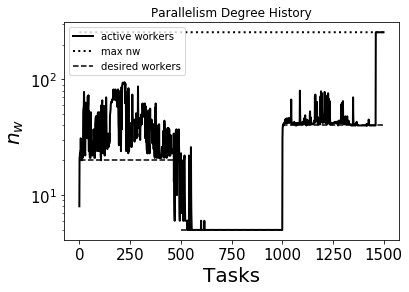

(20.0, 5.0, 40.0)

In [239]:
# plot parallelism degree vs max nw
results_df.plot(y=['active_workers_history', 'max_nw'],
                style=['-', ':'],
                color=['black'],
                label=['active workers', 'max nw'], linewidth=2) 

# expected workers
plt.hlines(nw_1, 1, m, linestyle='--', label='desired workers')
plt.hlines(nw_2, m+1, 2*m, linestyle='--')
plt.hlines(nw_3, 2*m+1, 3*m, linestyle='--')

plt.ylabel(r'$n_w$', fontsize=20)
plt.xlabel('Tasks', fontsize=20)
plt.yscale('log')
plt.legend(loc='upper left')
plt.title('Parallelism Degree History')
plt.show()

nw_1, nw_2, nw_3

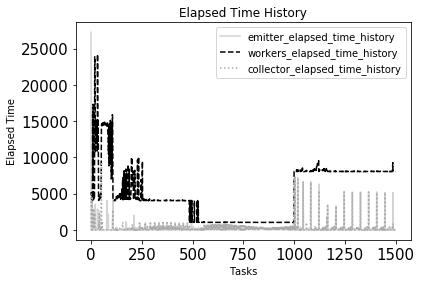

In [102]:
# plot emitter, workers and collector elapsed time history
results_df.plot(y=['emitter_elapsed_time_history','workers_elapsed_time_history','collector_elapsed_time_history'],
                style=['-', '--', ':'],
                color=['lightgray', 'black', 'darkgray'])
plt.ylabel('Elapsed Time')
plt.xlabel('Tasks')
plt.title('Elapsed Time History')
plt.show()

### Completion Time

In [78]:
tc_vs_nw_df = pd.read_csv('../Statistics/completion_time_vs_nw.csv')
tc_vs_nw_df.head()

,nw,completion_time
0,1,64182720
1,2,32097325
2,3,21393934
3,4,16016231
4,5,12815229


In [79]:
sequential_time = pd.read_csv('../Statistics/sequential_time.csv')
tseq = int(sequential_time['sequential_time'])
tseq

64000501

In [80]:
nw = tc_vs_nw_df['nw']
ideal_parallel_time = [tseq/n for n in nw]

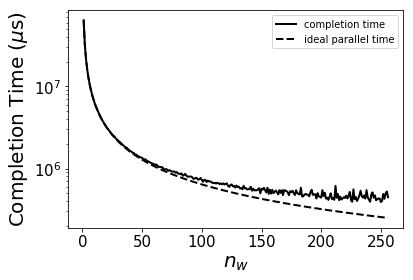

In [81]:
tc_vs_nw_df.plot(x='nw', y='completion_time', style='-', color='black', 
                 linewidth=2, label='completion time')
plt.plot(nw, ideal_parallel_time, linestyle='--', color='black',
         linewidth=2, label='ideal parallel time')

plt.yscale('log')
plt.xlabel(r'$n_w$', fontsize=20)
plt.ylabel('Completion Time ($\mu$s)', fontsize=20)
plt.legend(loc='best')
#plt.title('Completion Time')
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.show()

In [82]:
print("min completion time:", np.min(tc_vs_nw_df['completion_time']), 
      "obtained with", np.argmin(tc_vs_nw_df['completion_time'])+1, "workers")

min completion time: 390577 obtained with 250 workers


/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


### Scalability

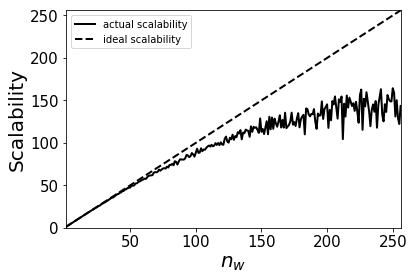

In [241]:
# scalability
tc = tc_vs_nw_df['completion_time']
nw = tc_vs_nw_df['nw']

scalability = [tc[0]/float(t) for t in tc]

plt.plot(nw, scalability, linestyle='-', label='actual scalability', color='black', linewidth=2)
plt.plot(nw, nw, linestyle='--', label='ideal scalability', color='black', linewidth=2)
plt.legend(loc='best')
plt.xlabel(r'$n_w$', fontsize=20)
plt.ylabel('Scalability', fontsize=20)
plt.ylim([0, np.max(nw)])
plt.xlim([1, np.max(nw)])
#plt.title('Scalability')
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

plt.show()

In [84]:
n_worker, max_scalability = np.argmax(scalability), np.max(scalability)
print('scalability at 64', round(scalability[63],2))
print('scalability at 128', round(scalability[127],2))
print('scalability at 256', round(scalability[255],2))
print("max scalability:", round(max_scalability,2), "obtained with", n_worker+1, "workers")

scalability at 64 61.26
scalability at 128 109.62
scalability at 256 143.47
max scalability: 164.33 obtained with 250 workers


### Speedup

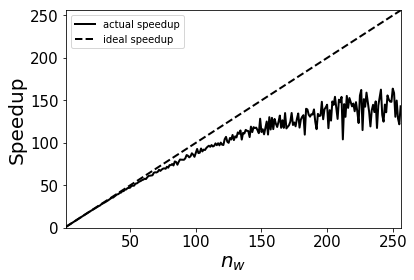

In [245]:
# speedup
tc = list(tc_vs_nw_df['completion_time'])

speedup = [tseq/float(t) for t in tc]

plt.plot(nw, speedup, linestyle='-', label='actual speedup', color='black', linewidth=2)
plt.plot(nw, nw, linestyle='--', label='ideal speedup', color='black', linewidth=2)
plt.legend(loc='best')
plt.xlabel(r'$n_w$', fontsize=20)
plt.ylabel('Speedup', fontsize=20)
plt.ylim([0, np.max(nw)])
plt.xlim([1, np.max(nw)])
#plt.title('Speedup')
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.show()

In [86]:
n_worker, max_speedup = np.argmax(speedup), np.max(speedup)
print('speedup at 64', round(speedup[63],2))
print('speedup at 128', round(speedup[127],2))
print('speedup at 256', round(speedup[255],2))
print("max speedup:", round(max_speedup,2), "obtained with", n_worker+1, "workers")

speedup at 64 61.08
speedup at 128 109.3
speedup at 256 143.06
max speedup: 163.86 obtained with 250 workers


### Efficiency

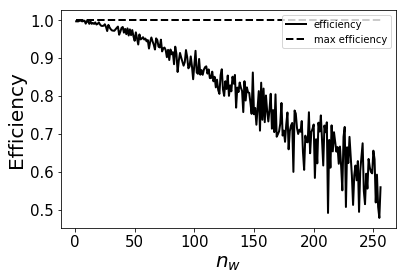

In [87]:
efficiency = [ sp/float(n) for n, sp in zip(nw, speedup)]
plt.hlines(1, 1, max(nw), linestyle='--', label='max efficiency', linewidth=2)
plt.plot(nw, efficiency, color='black', label='efficiency', linewidth=2)
plt.xlabel(r'$n_w$', fontsize=20)
plt.ylabel('Efficiency', fontsize=20)
#plt.title('Efficiency')
plt.legend(loc='best')
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.show()

In [93]:
print('efficiency at 64', round(efficiency[63],2))
print('efficiency at 128', round(efficiency[127],2))
print('efficiency at 256', round(efficiency[255],2))
print("max efficiency:", round(np.max(efficiency),2), "with nw=", np.argmax(efficiency)+1)
print("min efficiency:", round(np.min(efficiency),2), "with nw=", np.argmin(efficiency)+1)

efficiency at 64 0.95
efficiency at 128 0.85
efficiency at 256 0.56
max efficiency: 1.0 with nw= 4
min efficiency: 0.48 with nw= 255


### Alpha
- colonna 1: alpha
- colonna 2: ts_goal
- colonna 3-fine: service_time_history

In [89]:
ts_vs_alpha_df = pd.read_csv("../Statistics/service_time_history_vs_alpha.csv", header=None)
#ts_vs_alpha_df.head()

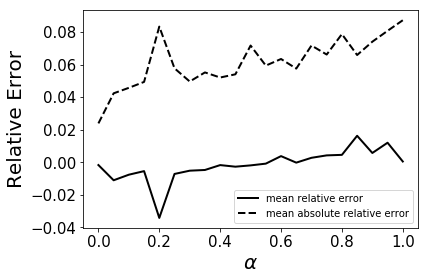

In [90]:
#ts_vs_alpha_df.loc[0, 1:]
alpha_values = ts_vs_alpha_df.loc[:,0]
ts_goal = ts_vs_alpha_df.loc[0,1]

ts_histories = np.array(ts_vs_alpha_df.loc[:, 2:])
n_alpha, n_tasks = ts_histories.shape

ts_goal = np.full((n_tasks),ts_goal)

rel_errors = np.array([(ts - ts_goal)/ts_goal for ts in ts_histories])

mean_rel_error = np.mean(rel_errors, 1)
mean_abs_rel_error = np.mean(np.abs(rel_errors), 1)

plt.plot(alpha_values, mean_rel_error, label='mean relative error', linestyle='-', color='black', linewidth=2)
plt.plot(alpha_values, mean_abs_rel_error, label='mean absolute relative error', linestyle='--', color='black', linewidth=2)
plt.legend(loc='best')
plt.xlabel(r'$\alpha$', fontsize=20)
plt.ylabel('Relative Error', fontsize=20)
#plt.title('Alpha')
plt.show()

In [91]:
print("min rel error:", round(np.min(mean_rel_error),4), "obtained with alpha:", alpha_values[np.argmin(mean_rel_error)])
print("min abs rel error:", round(np.min(mean_abs_rel_error),4), "obtained with alpha:", alpha_values[np.argmin(mean_abs_rel_error)])

min rel error: -0.0343 obtained with alpha: 0.2
min abs rel error: 0.0239 obtained with alpha: 0.0
